# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Ciencia de Datos**
### Tecnológico de Monterrey
### Prof María de la Paz Rico Fernández
### Tutor Orlando Figon

## **Reto-> Parte I**
### **Limpieza, análisis, visualización y kmeans**

**Nombres y matrículas de los integrantes del equipo:**

* Nicolás Mojica Gómez (A01794354)
* Erick Alexei Cambray Servin (A01794243)  

Para este trabajo el set de datos seleccionado fue el de **AGUAS SUBTERRANEAS**

## 1.PREPARACIÓN DE DATOS E INSTALACIÓN DE LIBRERIAS

In [312]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.options.display.max_columns = None

In [313]:
df_subterraneas = pd.read_csv('Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',
                                encoding= 'latin1')
df_superficiales = pd.read_csv('Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',
                                encoding= 'latin1')
escala_subterranea = pd.read_csv('Datos_de_calidad_del_agua_2020/Escalas_subterranea.csv',
                                encoding= 'latin1')
escala_superficial = pd.read_csv('Datos_de_calidad_del_agua_2020/Escalas_superficial.csv',
                                encoding= 'latin1')

In [314]:
# from google.colab import drive
# drive.mount('/content/drive')

In [315]:
# df_subterraneas = pd.read_csv('/content/drive/MyDrive/AguaCalidad/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',
#                                 encoding= 'latin1')
# df_superficiales = pd.read_csv('/content/drive/MyDrive/AguaCalidad/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',
#                                 encoding= 'latin1')
# escala_subterranea = pd.read_csv('/content/drive/MyDrive/AguaCalidad/Escalas_subterranea.csv',
#                                 encoding= 'latin1')
# escala_superficial = pd.read_csv('/content/drive/MyDrive/AguaCalidad/Escalas_superficial.csv',
#                                 encoding= 'latin1')

## 2.LIMPIEZA POR DATAFRAME
Veremos uno por uno como es que están los dataframes para poder dejar la información limpia para poder tener los datos limpios y clasificados.

### Aguas subterraneas

### 2.1.EXPLORACIÓN DE LOS DATOS

In [316]:
df_subterraneas

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,231.045,Alta,2350.0,Dudosa para riego,NaN,1545.8,Cultivos con manejo especial,Ligeramente salobres,<0.2,Baja,752.096,Muy dura e indeseable usos industrial y domesti

### 2.2. Identificando tendencias centrales promedio, media y mediana de los datos

In [317]:
df_subterraneas.describe(include= "all")

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068,1068,1068,1068,1068,1068,1068,1068.000000,1068.000000,1068.0,1064.000000,1064,1062.000000,1062,0.0,1066,1066,1066,1068,1068,1067,1067,1068,1068,1067,1067,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,634,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,1068,1066,13,32,452,273,8,NaN,NaN,NaN,NaN,4,NaN,5,NaN,925,5,4,862,4,889,4,125,5,995,3,209,3,3,2,168,2,61,2,31,2,362,3,615,2,3,126,3,3,3,3,2,3,2,3,2,2,2,2,2,2,2
top,DLAGU6,EL FUERTE,CUENCAS CENTRALES DEL NORTE,DURANGO,LA PAZ,PENINSULA DE YUCATAN,POZO,NaN,NaN,NaN,NaN,Alta,NaN,Permisible para riego,NaN,496,Excelente para riego,Potable - Dulce,<0.2,Baja,<20,Potable - Dura,<1.1,Potable - Excelente,<0.02,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,1,2,232,121,27,119,1039,NaN,NaN,NaN,NaN,794,NaN,460,NaN,4,491,834,162,434,26,577,737,739,65,788,815,816,1066,1066,854,1053,968,1067,1038,1056,545,982,401,932,434,78,1005,939,995,995,876,841,1007,985,941,1066,1053,1067,1056,982,932
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101.891007,23.163618,2020.0,235.633759,NaN,1138.953013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.703263,3.887670,0.0,116.874291,NaN,1245.563674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-116.664250,14.561150,2020.0,26.640000,NaN,50.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-105.388865,20.212055,2020.0,164.000000,NaN,501.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-102.174180,22.617190,2020.0,215.527500,NaN,815.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-98.974716,25.510285,2020.0,292.710000,NaN,1322.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
df_subterraneas.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

In [319]:
df_subterraneas.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

### 2.3. Identificar medidas de dispersión, máximo, mínimo .

Este punto queda solucionado con la parte del superior de la descripcion del set de datos

In [320]:
df_subterraneas['COLI_FEC_NMP/100_mL']

0       <1.1
1       <1.1
2       <1.1
3       <1.1
4        291
        ... 
1063    <1.1
1064    <1.1
1065     620
1066    <1.1
1067    <1.1
Name: COLI_FEC_NMP/100_mL, Length: 1068, dtype: object

In [321]:
df_subterraneas['COLI_FEC_NMP/100_mL'] = df_subterraneas['COLI_FEC_NMP/100_mL'].replace({'<1.1':1.1}).astype('float')

In [322]:
def calidad_coli_fec(coli_fec):
    if coli_fec == '<1.1': return 'Excelente'
    elif (coli_fec > 1.1 and  coli_fec <= 200): return 'Buena Calidad'
    elif (coli_fec > 200 and  coli_fec <= 1000): return 'Aceptable'
    elif (coli_fec > 1000 and  coli_fec <= 10000): return 'Contaminada'
    else: return 'Fuertemente contaminada'

In [323]:
df_subterraneas['y_calidad'] = df_subterraneas['COLI_FEC_NMP/100_mL'].apply(lambda x: calidad_coli_fec(x))


In [324]:
subterraneas_col_id = ['SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
                        'ACUIFERO', 'SUBTIPO', 'PERIODO']

subterraneas_col_calidad = [x for x in df_subterraneas.columns if x[0:7] == 'CALIDAD'] + ['SEMAFORO']

subterraneas_col_medicion = [x for x in df_subterraneas.columns if x[-1] == 'L']

subterraneas_col_cumplimiento = [x for x in df_subterraneas.columns if x[0:7] == 'CUMPLE_']

subterraneas_col_localizacion = ['LONGITUD', 'LATITUD']

Porcentaje de nulos por cada columna

In [325]:
pd.DataFrame(df_subterraneas.isna().sum() /len(df_subterraneas)).sort_values(by= 0, ascending= False)

,0
SDT_mg/L,1.000000
CONTAMINANTES,0.406367
CALIDAD_CONDUC,0.005618
CONDUCT_mS/cm,0.005618
CALIDAD_ALC,0.003745
ALC_mg/L,0.003745
CALIDAD_SDT_ra,0.001873
SDT_M_mg/L,0.001873
CALIDAD_SDT_salin,0.001873
CALIDAD_N_NO3,0.000936


Podemos ver que la variable de SDT_mg/L está en su totalidad siendo NaN por lo que la eliminaremos y veremos si es que es suficiente con imputar los valores de las demás variables en nulo ya que tenemos una con hasta 50% de nulos. Veremos que tanto aporta al dataframe y después decidiremos si es que es necesario quedarnosla.

In [326]:
df_subterraneas.drop('SDT_mg/L', axis= 1, inplace=True)

In [327]:
subterraneas_col_medicion = [x for x in subterraneas_col_medicion if x != 'SDT_mg/L']

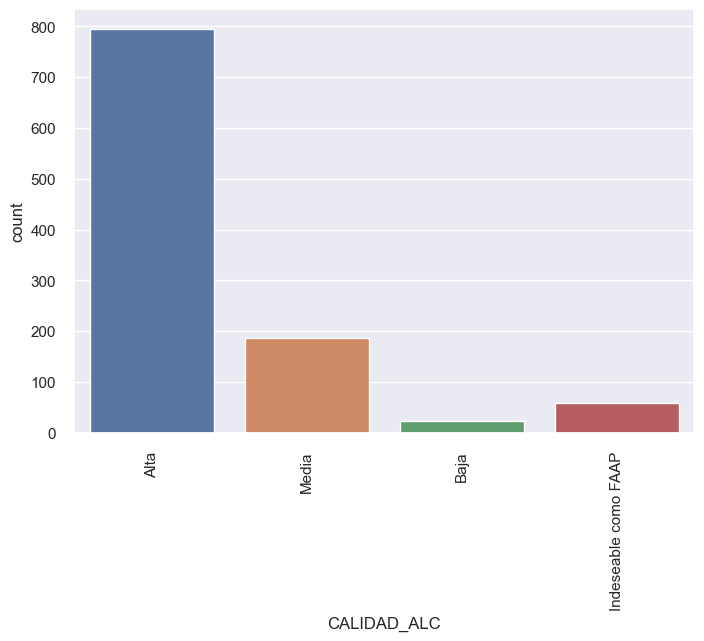

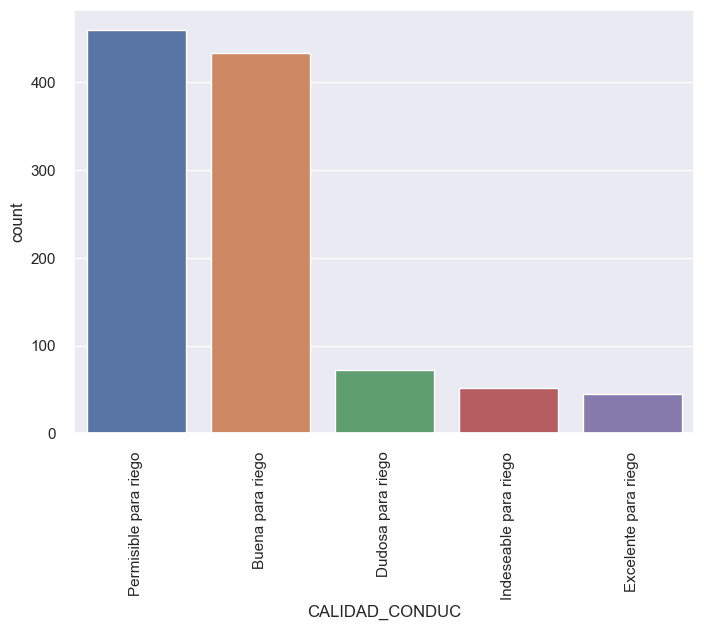

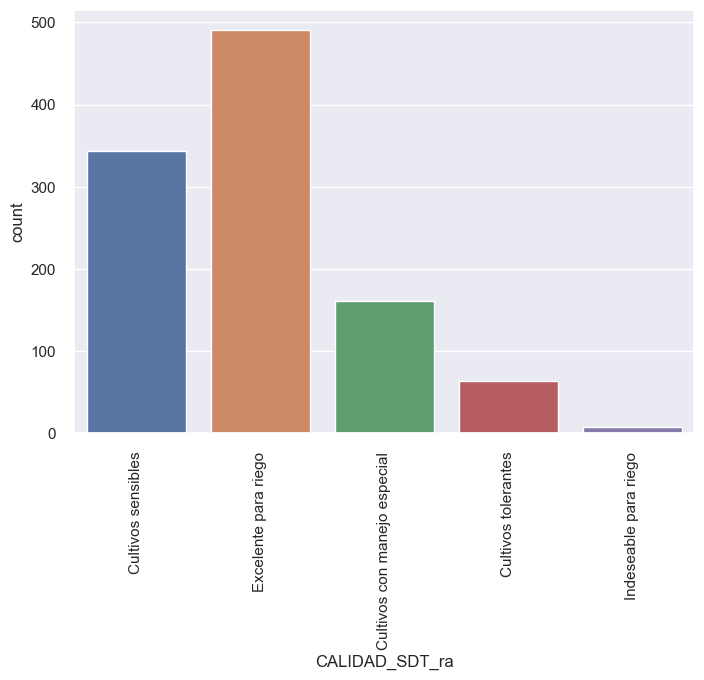

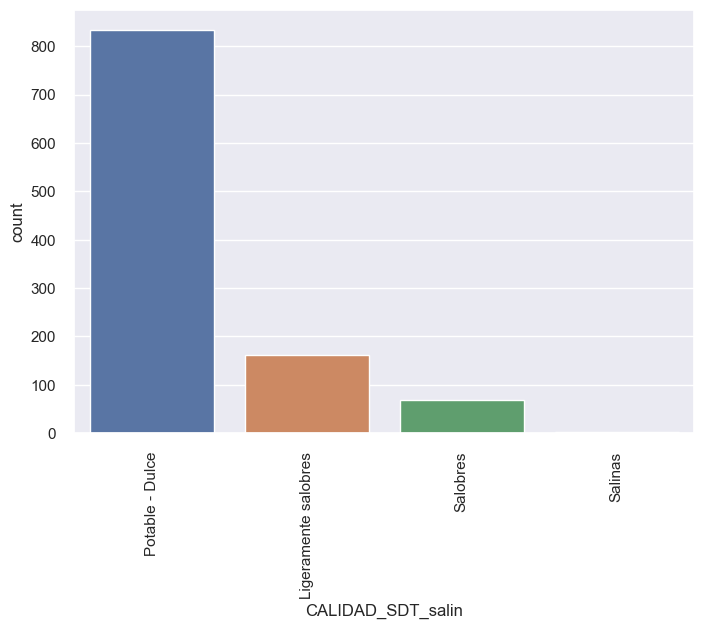

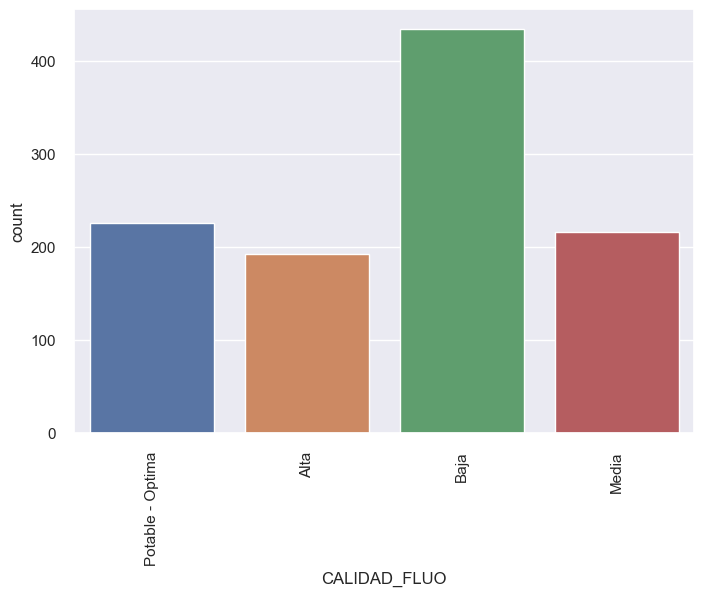

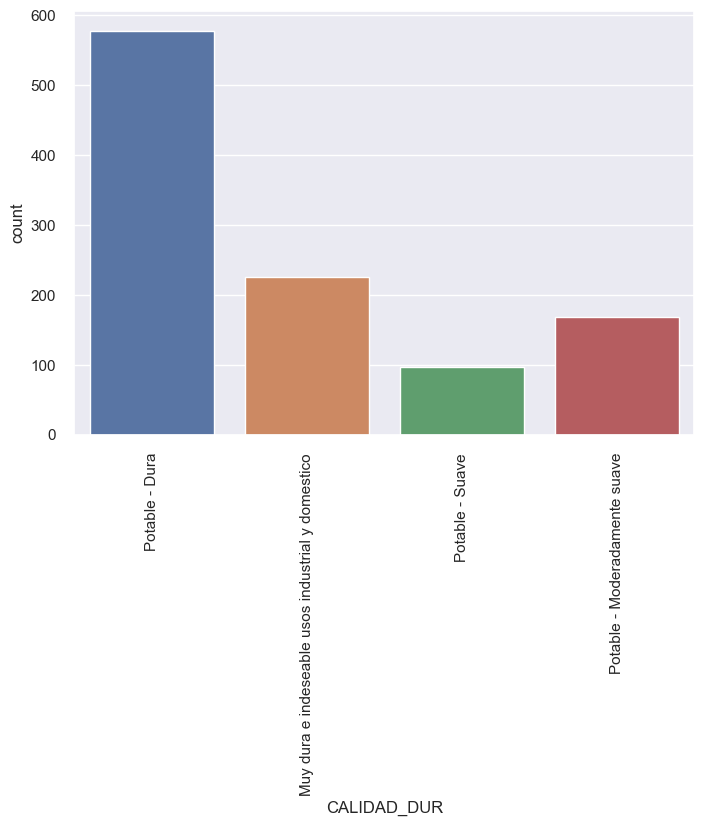

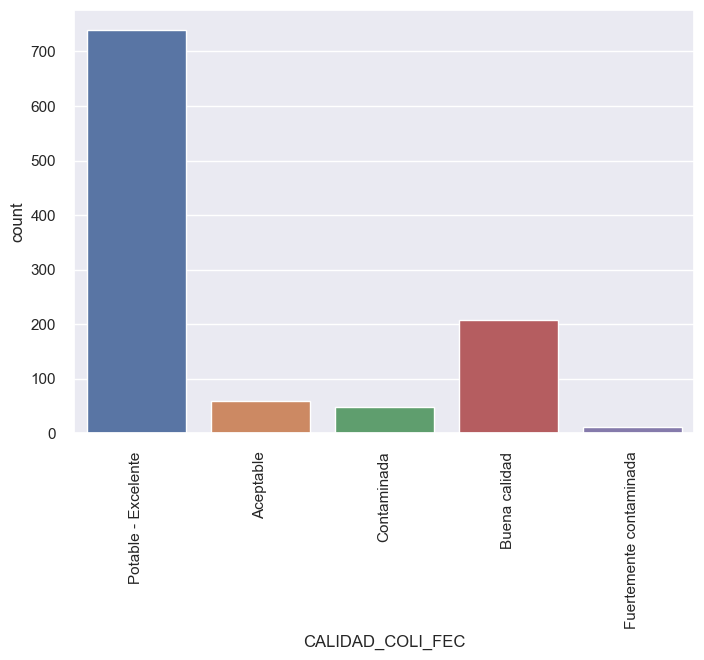

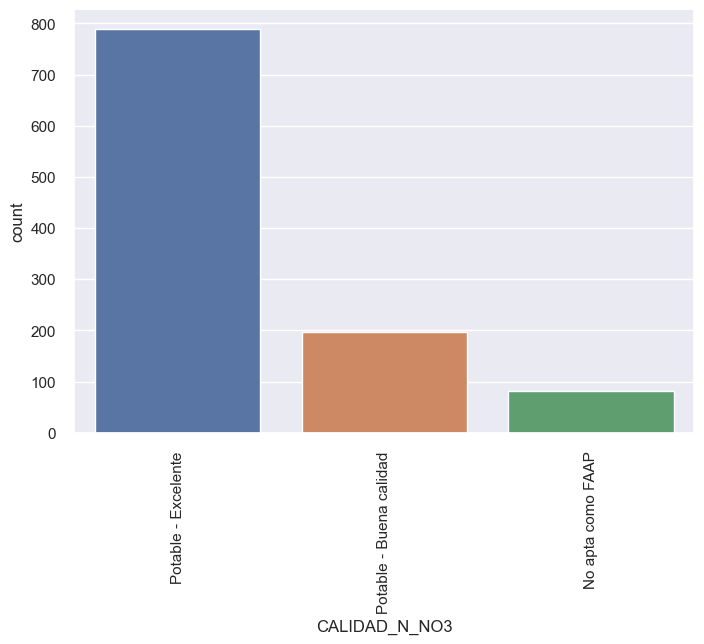

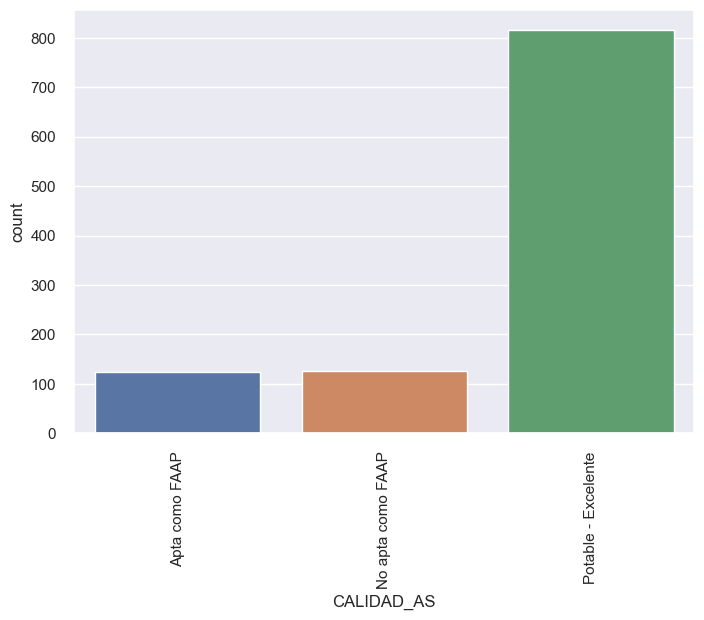

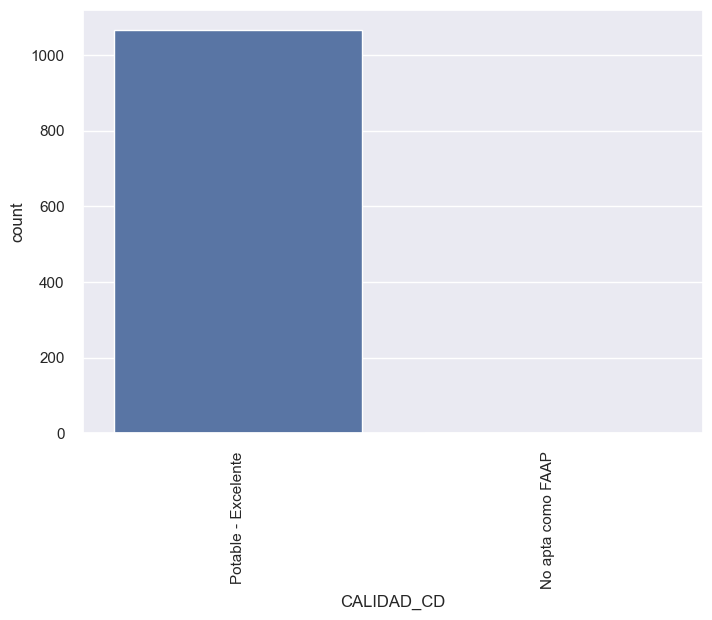

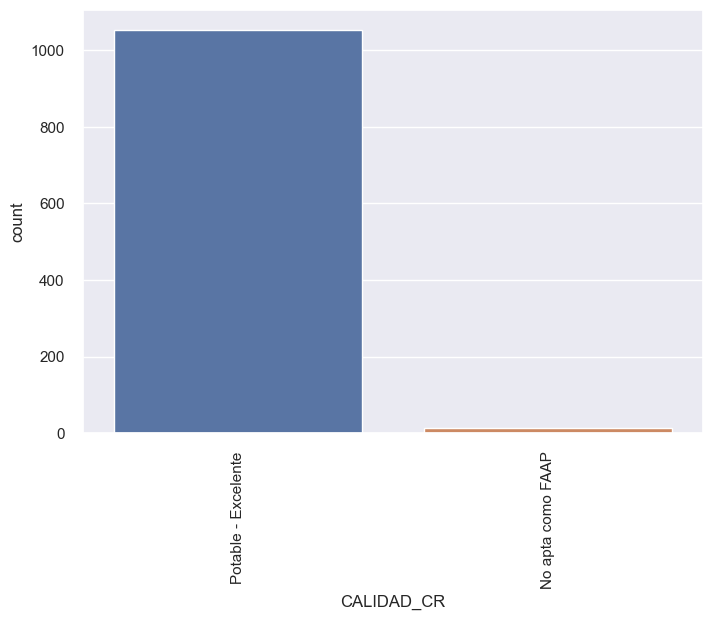

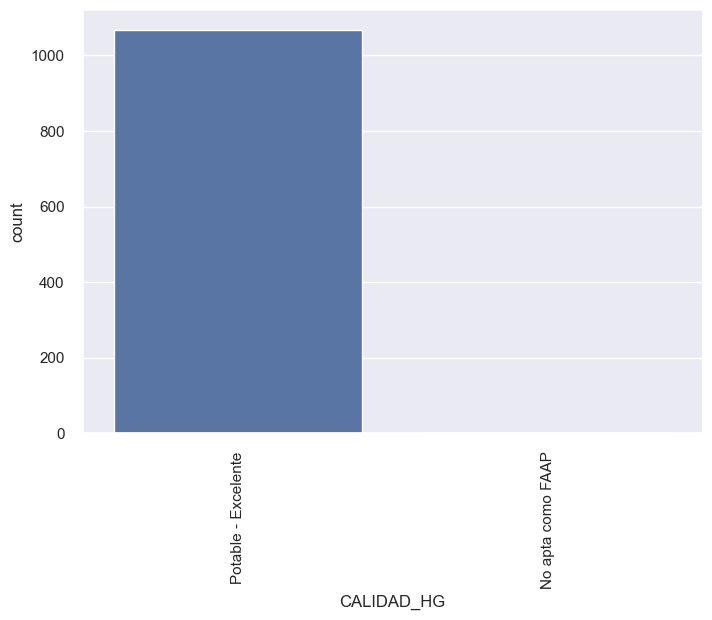

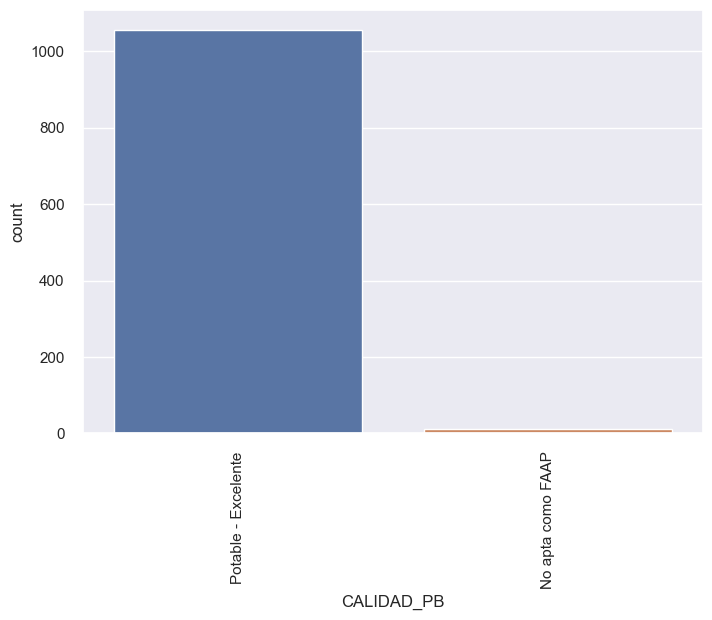

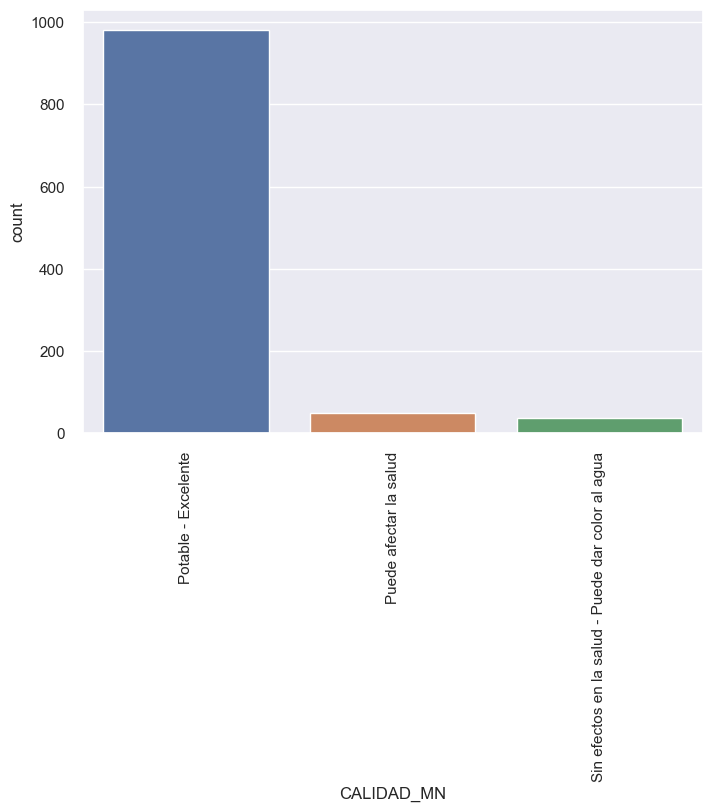

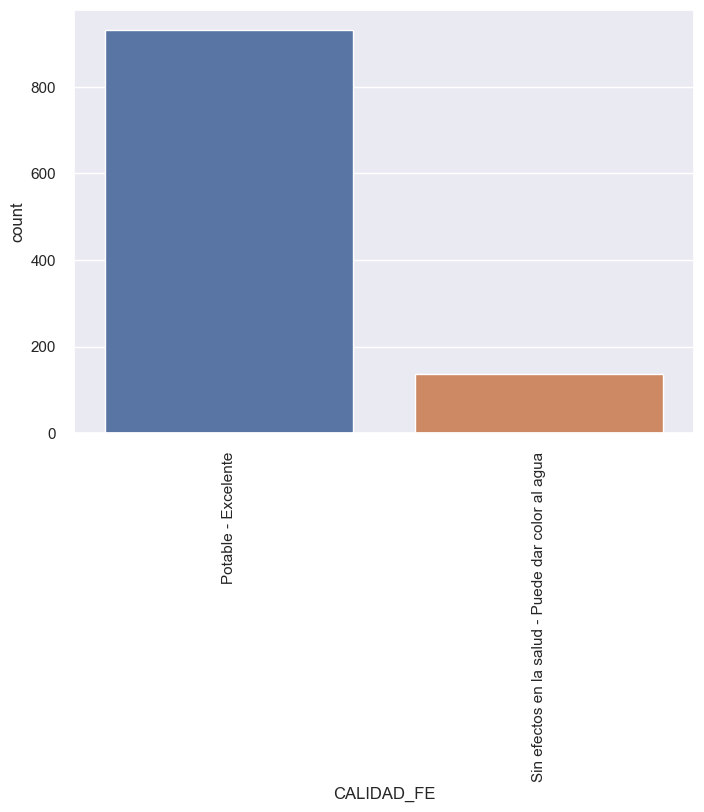

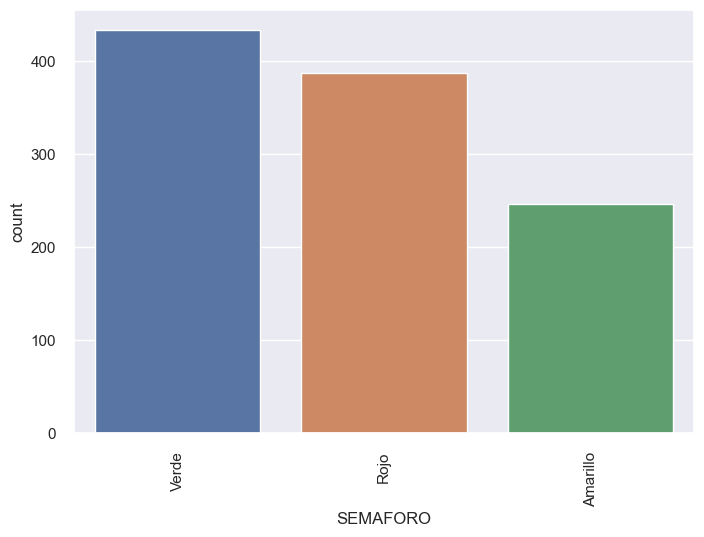

In [328]:
for col in subterraneas_col_calidad:
    sns.countplot(x= df_subterraneas[col])
    # plt.figure(figsize=(10,10))
    plt.xticks(rotation= 90)
    plt.show()

La otra variable que tiene muchos valores en NaN es contaminantes pero como podemos ver es una variable la cual aunque tiene muchos valores distinto tendremos que ver si es que su densidad es mucha para ese valor y tomar la decisión correcta al imputar.

In [329]:
pd.DataFrame(df_subterraneas['CONTAMINANTES'].value_counts(normalize=True))

,CONTAMINANTES
"FLUO,",0.123028
"DT,",0.102524
"FLUO,AS,",0.080442
"CF,",0.048896
"AS,",0.048896
...,...
"ALC,CONDUC,SDT_ra,SDT_salin,DT,NO3,",0.001577
"ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,",0.001577
"PB,MN,FE,",0.001577
"ALC,AS,FE,",0.001577


Primero podemos ver con esto que cuando hay más de un contaminante en la observación este es separado por comas por lo que primero tendríamos que limpiar esa columna para seguir con el trabajo de imputación

In [330]:
aux = df_subterraneas['CONTAMINANTES'].str.split(',', expand=True).T.replace({'': 'vacio', np.nan: 'NaN_'})
lista_contaminantes = []
for col in aux.columns:
    lista_contaminantes.append(list(aux[col].unique()))

# print(lista_contaminantes)

In [331]:
dummies_contaminantes = pd.get_dummies(
    pd.Series(lista_contaminantes).apply(pd.Series).stack()).sum(level=0)


C:\Users\alexe\AppData\Local\Temp\ipykernel_26032\3321957741.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies_contaminantes = pd.get_dummies(


In [332]:
dummies_contaminantes.sum()

ALC            59
AS            127
CD              2
CF             61
CONDUC        123
CR             15
DT            226
FE            136
FLUO          192
HG              1
MN             86
NI              2
NO3            82
NaN_         1067
PB             12
SDT_ra         71
SDT_salin      71
vacio         634
dtype: int64

Ya lo podemos ver por categoría pero el problema es que realmente no nos ayuda adivinar cual es el valor dentro de esos mil registros.
Por lo que mejor borraremos la columna y el modelo podrá tomar esos como otra categoría si es que tiene los demás valores como 0 
y ya solo faltaría unirlo con el dataframe original.

In [333]:
dummies_contaminantes.drop('NaN_', axis= 1, inplace= True)
df_subterraneas.drop('CONTAMINANTES', axis=1, inplace= True)

In [334]:
lista_contaminantes = dummies_contaminantes.columns

In [335]:
df_subterraneas = pd.concat([df_subterraneas, dummies_contaminantes], axis= 1)
df_subterraneas

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,y_calidad,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin,vacio
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,Fuertemente contaminada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,Fuertemente contaminada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,Fuertemente contaminada,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,Fuertemente contaminada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291.0,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,Aceptable,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Seguiremos con la limpieza de las mediciones con valor en unidades de contaminantes

Con esto podemos ver que se tienen varios valores en lo que caen directamente a los que son menores y los demás casi no tienen datos por lo que haré una separación por frecuencias para así poder agrupar tanto la masa más grande así como identificar si es que hay variables unarias.

In [336]:
def normalizar(df,v,umbral):
    aux = df[v].value_counts(normalize=True).to_frame()
    aux[f'n_{v}'] = np.where(aux[v] < umbral , 'Otros', aux.index)

    moda = aux.head(1)[f'n_{v}'].values[0]

    if aux.loc[aux[f'n_{v}'] == 'Otros' ][v].sum() < umbral:
        aux[f'n_{v}'].replace( {'Otros':moda} , inplace=True)

    aux.drop(v, axis=1, inplace=True)
    aux.reset_index(inplace=True)

    return df.merge(aux,left_on=[v], right_on='index', how='inner').drop('index',axis=1)

In [337]:
for col in subterraneas_col_medicion:
    df_subterraneas = normalizar(df_subterraneas, col, 0.05)

df_subterraneas

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,y_calidad,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin,vacio,n_ALC_mg/L,n_SDT_M_mg/L,n_FLUORUROS_mg/L,n_DUR_mg/L,n_COLI_FEC_NMP/100_mL,n_N_NO3_mg/L,n_AS_TOT_mg/L,n_CD_TOT_mg/L,n_CR_TOT_mg/L,n_HG_TOT_mg/L,n_PB_TOT_mg/L,n_MN_TOT_mg/L,n_FE_TOT_mg/L
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,Fuertemente contaminada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Otros,Otros,Otros,Otros,1.1,Otros,Otros,<0.003,<0.005,<0.0005,<0.005,<0.0015,Otros
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,Fuertemente contaminada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Otros,Otros,Otros,Otros,1.1,Otros,Otros,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.288010,22.366850,2020,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,Fuertemente contaminada,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,Otros,Otros,Otros,Otros,1.1,Otros,Otros,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,OCCCN5268M1,POZO 369 ALBIA,CUENCAS CENTRALES DEL NORTE,COAHUILA DE ZARAGOZA,TORREON,PRINCIPAL-REGION LAGUNERA,POZO,-103.361060,25.670980,2020,135.915,Media,486.0,Buena para riego,251,Excelente para riego,Potable - Dulce,4.0054,Alta,<20,Potable - Suave,10.0,Buena calidad,0.365728,Potable - Excelente,0.0238,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,Buena Calidad,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,Otros,Otros,Otros,Otros,Otros,Otros,Otros,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
4,DLSAN2331,POZO SAN DIEGO,GOLFO NORTE,SAN LUIS POTOSI,RIOVERDE,RIO VERDE,POZO,-100.084960,21.919460,2020,203.670,Alta,501.0,Buena para riego,401.4,Excelente para riego,Potable - Dulce,0.2816,Baja,166.2528,Potable - Dura,1.1,Potable - Excelente,3.550095,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable -

Ahora eliminamos las columnas unarias ya qu no van a aportar a la modelación por no tener variación y ser solamente un valor.

In [338]:
varn = df_subterraneas.filter(like='n_').columns.tolist()
unarias = [v for v,conteo in zip(varn, [ df_subterraneas[v].unique().shape[0] for v in varn ] ) if conteo == 1]
unarias

['n_ALC_mg/L', 'n_SDT_M_mg/L', 'n_DUR_mg/L', 'n_CD_TOT_mg/L', 'n_PB_TOT_mg/L']

In [339]:
varn = [v for v in varn  if v not in unarias]

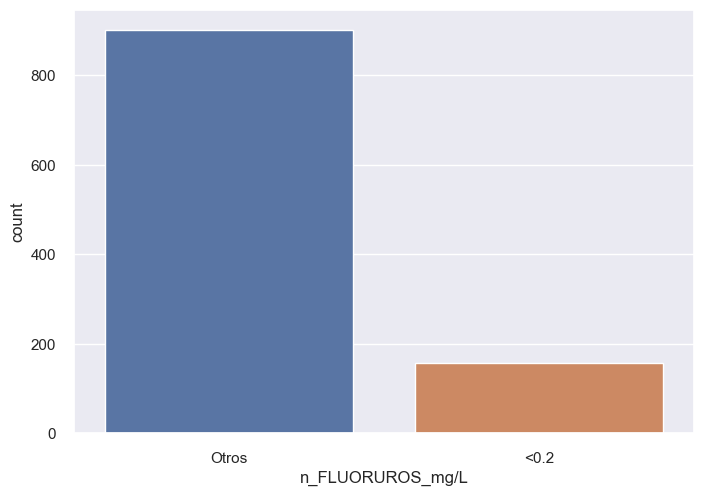

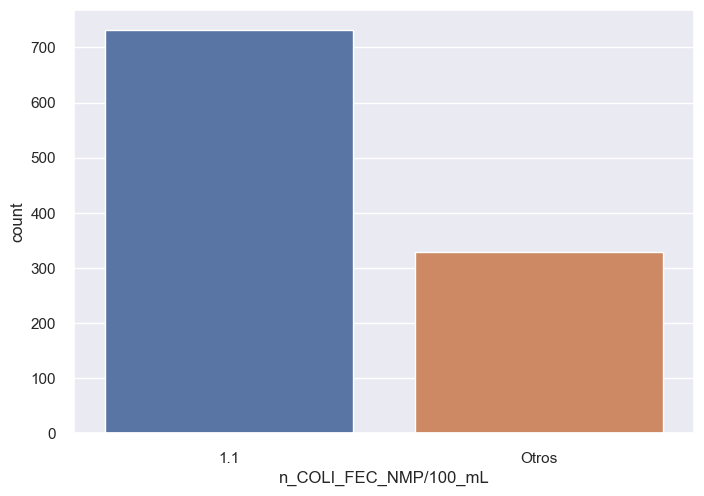

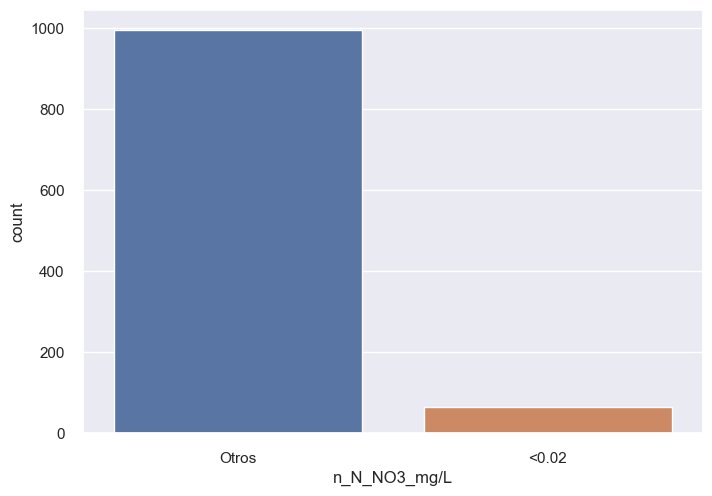

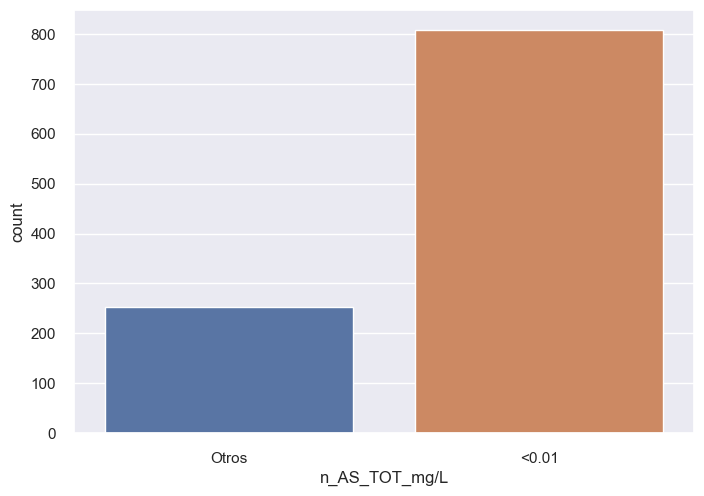

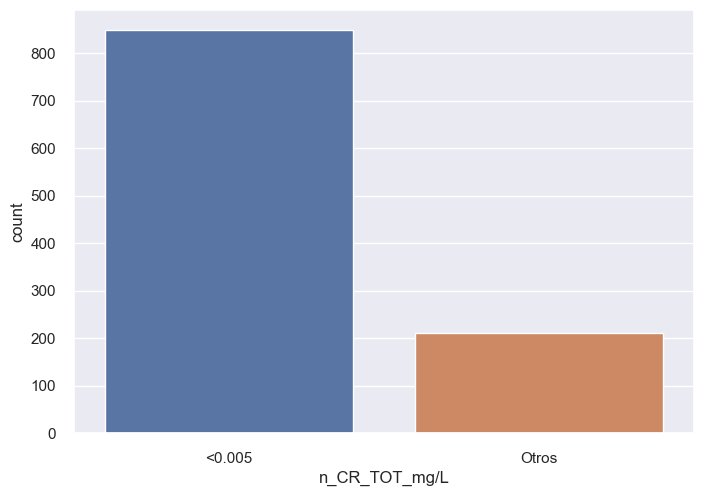

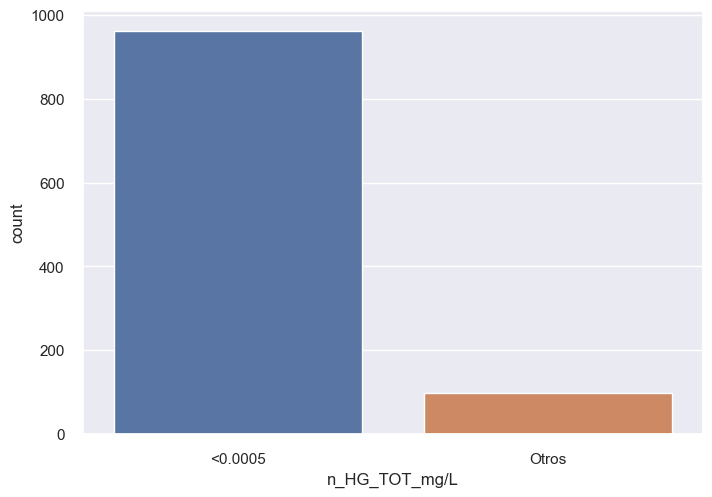

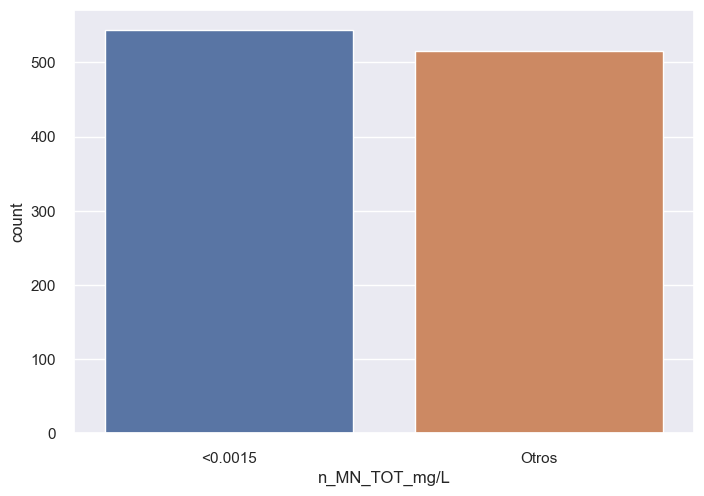

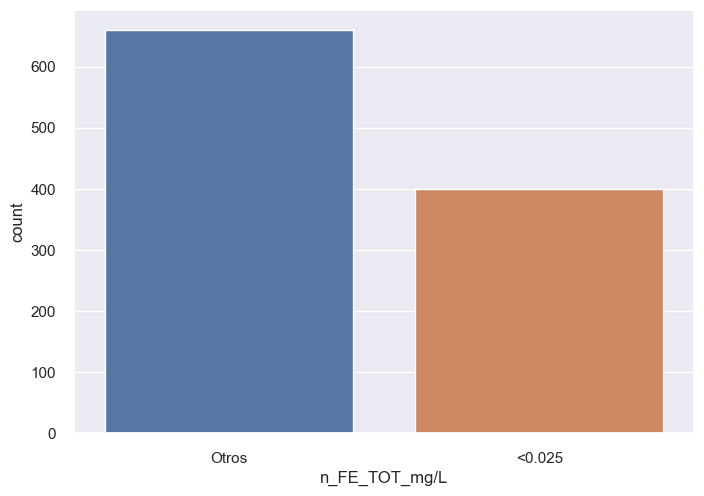

In [340]:
for x in varn:
    sns.countplot(x=df_subterraneas[x])
    plt.show()

Cómo vemos ahora realmente las que parecían ser variables continuas no tienen una densidad mayor que el valor de menor entonces eso como ya veíamos es predomintante para poder marcas las categorías

### 2.4. Identificar correlaciones

In [341]:
df_subterraneas.corr()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,COLI_FEC_NMP/100_mL,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin,vacio
LONGITUD,1.000000,-0.760644,NaN,0.166900,0.061019,-0.084959,0.029782,-0.136862,0.034026,-0.108602,0.059239,0.079594,0.159179,0.010508,-0.093856,0.021211,-0.085782,0.023489,-0.113091,0.012339,-0.107855,-0.107855,0.007232
LATITUD,-0.760644,1.000000,NaN,-0.080310,0.053096,0.063209,-0.068275,0.154223,-0.036137,0.021085,0.030456,-0.121885,0.048671,-0.048811,0.100446,-0.038186,-0.032871,-0.070779,0.127902,-0.069984,0.136321,0.136321,0.065855
PERIODO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALC_mg/L,0.166900,-0.080310,NaN,1.000000,0.231425,-0.016797,0.614030,0.036084,0.009736,0.008543,0.102248,-0.013167,0.259408,0.064577,0.014286,0.031559,0.170190,-0.006845,0.030568,0.039292,0.068354,0.068354,0.239375
CONDUCT_mS/cm,0.061019,0.053096,NaN,0.231425,1.000000,0.017348,0.182570,-0.009844,0.008619,0.010861,0.696387,0.004043,0.515357,0.118031,-0.011638,0.067841,0.069354,-0.010818,0.191048,0.057646,0.587058,0.587058,0.306564
COLI_FEC_NMP/100_mL,-0.084959,0.063209,NaN,-0.016797,0.017348,1.000000,-0.017901,0.006272,0.024929,0.634821,0.013269,-0.020735,0.013479,0.100235,-0.004910,-0.005326,0.004226,-0.007536,-0.017767,0.012342,0.030679,0.030679,0.132360
ALC,0.029782,-0.068275,NaN,0.614030,0.182570,-0.017901,1.000000,0.062484,-0.010556,-0.042323,0.091913,-0.029087,0.104695,0.104742,0.078893,-0.007460,0.153920,-0.010556,0.070835,-0.025979,0.083093,0.083093,0.200573
AS,-0.136862,0.154223,NaN,0.036084,-0.009844,0.006272,0.062484,1.000000,-0.016041,-0.041271,-0.024825,-0.019607,-0.071478,0.024622,0.363686,-0.011337,-0.013872,-0.016041,0.026561,-0.039479,-0.005887,-0.005887,0.304807
CD,0.034026,-0.036137,NaN,0.009736,0.008619,0.024929,-0.010556,-0.016041,1.000000,0.082603,0.052125,-0.005209,0.030444,0.048599,-0.020384,-0.001336,0.066700,-0.001890,-0.012422,-0.004652,-0.011649,-0.011649,0.035920
CF,-0.108602,0.021085,NaN,0.008543,0.010861,0.634821,-0.042323,-0.041271,0.082603,1.000000,0.011658,-0.029605,0.009835,0.051413,-0.052609,-0.007593,0.015592,-0.010744,0.006076,0.050138,0.014813,0.014813,0.204148


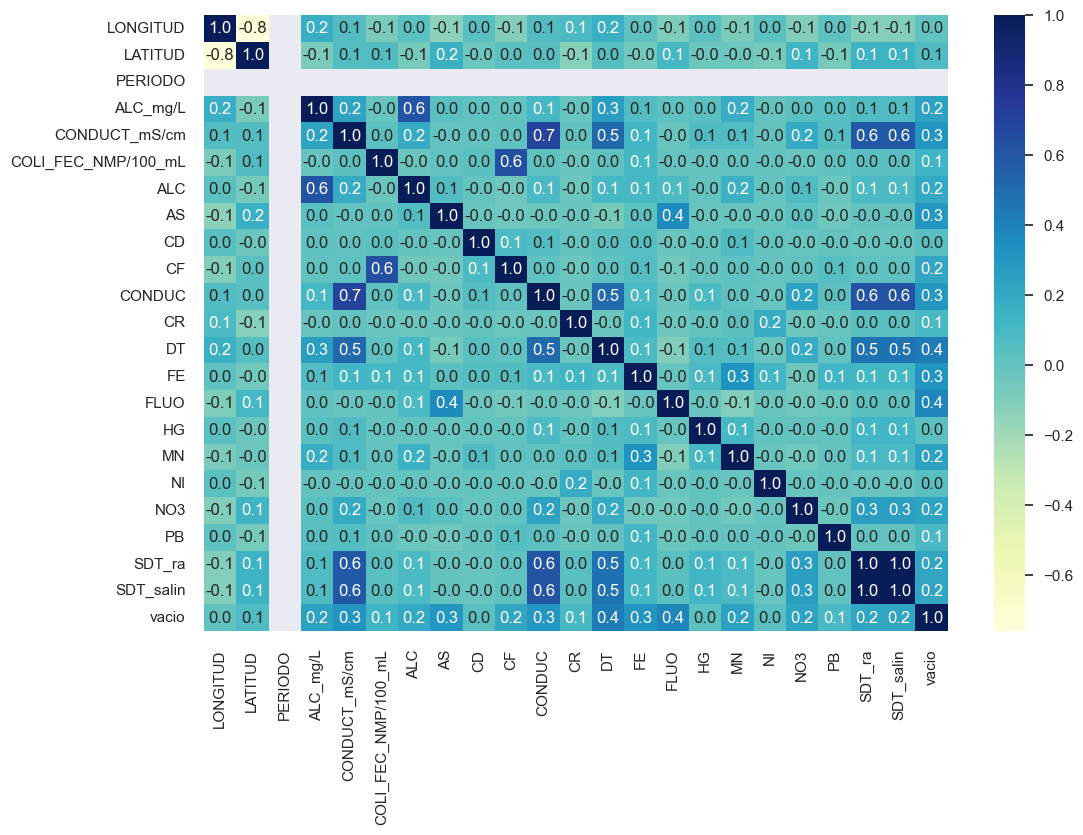

In [342]:
fig, ax = plt.subplots(figsize=(12 ,8))
_ = sns.heatmap(df_subterraneas.corr(), cmap= 'YlGnBu', annot= True, fmt= "0.1f")

Ya solo dejaremos los datos listos para ser ingestados en un modelo

In [343]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

um = ['CLAVE', 'LONGITUD', 'LATITUD']
Pipe_categoricas = make_pipeline(OneHotEncoder(drop= 'first'))
cols_pipe_categorica = varn + subterraneas_col_id + subterraneas_col_cumplimiento + subterraneas_col_calidad

In [344]:
escala_subterranea.head()

,CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas,CRITERIO,DESCRIPCION
0,Excelente,COLI_FEC menor a 1.1,Agua potable. Agua no contaminada o condicion ...
1,Buena calidad,COLI_FEC mayor o igual de 1.1 y menor o igual ...,Aguas para uso recreativo con contacto primari...
2,Aceptable,COLI_FEC mayor de 200 y menor o igual a 1000,Aguas con calidad admisible como fuente de aba...
3,Contaminada,COLI_FEC mayor de 1000 y menor o igual a 10000,Aguas con contaminacion bacteriologica. Indic...
4,Fuertemente contaminada,COLI_FEC mayor de 10000,Aguas con fuerte contaminacion bacteriologica....


In [345]:
from sklearn.cluster import KMeans


transformer = make_column_transformer([Pipe_categoricas, cols_pipe_categorica])
k_max = 10
inertia = []
for i in range(1,k_max+1):
    model_pipe = Pipeline([('transf_col', transformer),
                        ('modelo', KMeans(n_clusters= i))])
    model_pipe.fit(df_subterraneas[cols_pipe_categorica + subterraneas_col_localizacion])

    inertia.append(model_pipe['modelo'].inertia_)

inertia

[12099.848113207574,
 11379.49573612227,
 10766.94036564158,
 10266.192896281731,
 9964.15090242372,
 9798.096010608893,
 9637.317177260944,
 9419.471696304272,
 9320.7911370785,
 9118.38739008961]

c:\Users\alexe\OneDrive\Documentos\Entornos virtuales\mna_env\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\alexe\OneDrive\Documentos\Entornos virtuales\mna_env\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\alexe\OneDrive\Documentos\Entornos virtuales\mna_env\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https:/

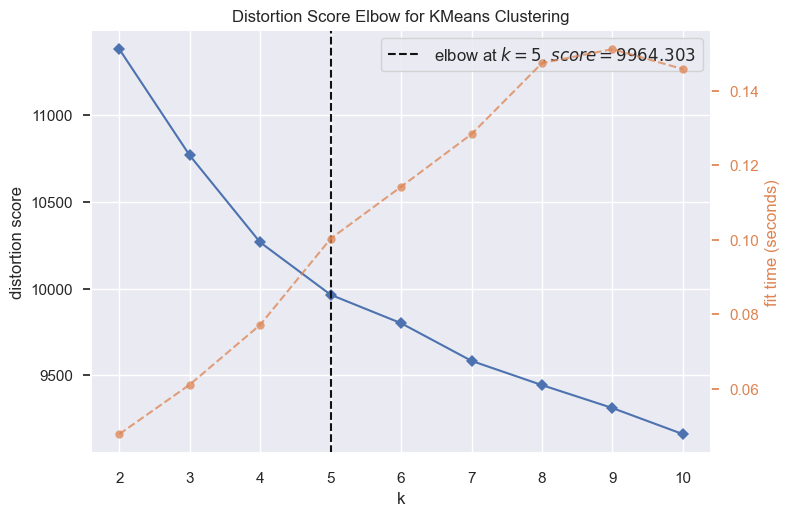

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [346]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model_pipe['modelo'], k=(10))

visualizer.fit(model_pipe['transf_col'].fit_transform(df_subterraneas[cols_pipe_categorica + subterraneas_col_localizacion]))
visualizer.show()

In [347]:
model_pipe = Pipeline([('transf_col', transformer),
                        ('modelo', KMeans(n_clusters= 5))])
model_pipe.fit(df_subterraneas[cols_pipe_categorica])

Pipeline(steps=[('transf_col',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['n_FLUORUROS_mg/L',
                                                   'n_COLI_FEC_NMP/100_mL',
                                                   'n_N_NO3_mg/L',
                                                   'n_AS_TOT_mg/L',
                                                   'n_CR_TOT_mg/L',
                                                   'n_HG_TOT_mg/L',
                                                   'n_MN_TOT_mg/L',
                                                   'n_FE_TOT_mg/L', 'SITIO',
                                                   'ORGANISMO_DE_CUENCA',
                                                   'ESTADO', 'MUNICIPIO',
                                                   'ACUIFERO', 'SUBTIPO',
                                                   'PERIODO', 'CUMPLE_CON_ALC',
                                                   'CUMPLE_CON_COND',
                                                   'CUMPLE_CON_SDT_ra',
                                                   'CUMPLE_CON_SDT_salin',
                                                   'CUMPLE_CON_FLUO',
                                                   'CUMPLE_CON_DUR',
                                                   'CUMPLE_CON_CF',
                                                   'CUMPLE_CON_NO3',
                                                   'CUMPLE_CON_AS',
                                                   'CUMPLE_CON_CD',
                                                   'CUMPLE_CON_CR',
                                                   'CUMPLE_CON_HG',
                                                   'CUMPLE_CON_PB',
                                                   'CUMPLE_CON_MN',
                                                   'CUMPLE_CON_FE', ...])])),
                ('modelo', KMeans(n_clusters=5))])

In [348]:
df_subterraneas['cluster'] = model_pipe.predict(df_subterraneas[cols_pipe_categorica ])

In [349]:
import geopandas as gpd
from tqdm import tqdm

In [350]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

# world.head()
world[world.continent == 'North America'].name.unique()

array(['Canada', 'United States of America', 'Haiti', 'Dominican Rep.',
       'Bahamas', 'Greenland', 'Mexico', 'Panama', 'Costa Rica',
       'Nicaragua', 'Honduras', 'El Salvador', 'Guatemala', 'Belize',
       'Puerto Rico', 'Jamaica', 'Cuba', 'Trinidad and Tobago'],
      dtype=object)

<bound method Axes.get_legend_handles_labels of <AxesSubplot: >>

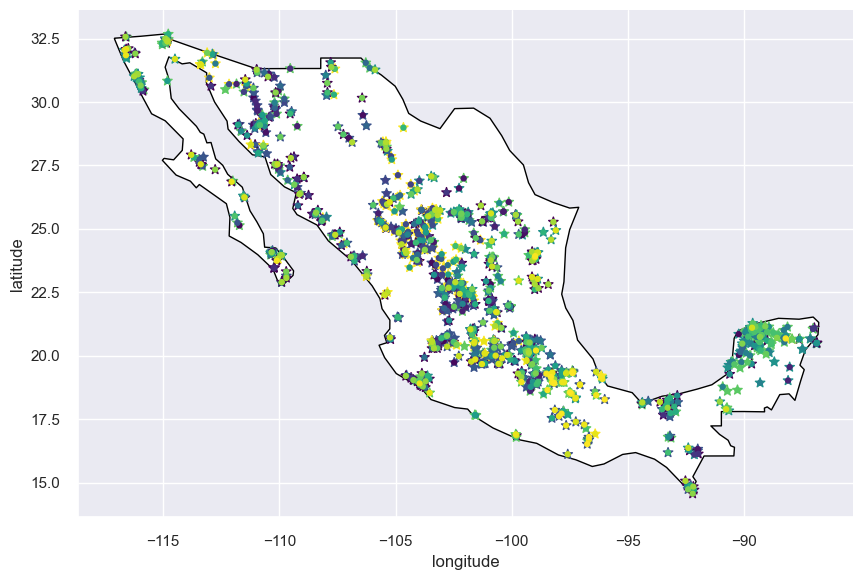

In [351]:
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.scatter(df_subterraneas['LONGITUD'],
            df_subterraneas['LATITUD'],
             c=df_subterraneas['cluster'], s=50,
              cmap='viridis', marker= '*',
              label = 'cluster')
plt.scatter(df_subterraneas['LONGITUD'],
            df_subterraneas['LATITUD'],
             c=[x[0] for x in enumerate(df_subterraneas['y_calidad'])],
              s=50, cmap='viridis', marker= '.',
              label = 'Por Reglas')
ax.get_legend_handles_labels

In [352]:
df_subterraneas.groupby(['cluster', 'y_calidad'])[['CLAVE']].count().sort_values(by = ['cluster','CLAVE'], ascending= False)

CLAVE
cluster y_calidad                     
4       Fuertemente contaminada    115
        Buena Calidad               38
        Aceptable                    7
        Contaminada                  3
3       Fuertemente contaminada    247
        Aceptable                    2
        Buena Calidad                2
2       Fuertemente contaminada     75
        Buena Calidad               30
        Aceptable                   16
        Contaminada                  6
1       Fuertemente contaminada    298
        Aceptable                    2
        Buena Calidad                1
0       Buena Calidad              136
        Contaminada                 40
        Aceptable                   33
        Fuertemente contaminada      9

Al hacer la comparación de la calidad con los clusters obtenidos teniendo en cuenta las variables que determinan la calidad del agua y su sus demás validaciones a los cuerpos de agua subterraneos podemos ver que no hay una relación directa entre su calidad y localización.
Lo podemos confirmar que no hay una relación clara entre ellos ya que cuando vemos como es que quedan los puntos hechos por las reglas de 

## Modelo Dummy para confirmación
Vamos a hacer la confirmación de que tomando solo la calidad y la localización aún así no se tiene una relación entre las variables

In [353]:
from sklearn.compose import ColumnTransformer

c:\Users\alexe\OneDrive\Documentos\Entornos virtuales\mna_env\lib\site-packages\sklearn\cluster\_kmeans.py:996: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


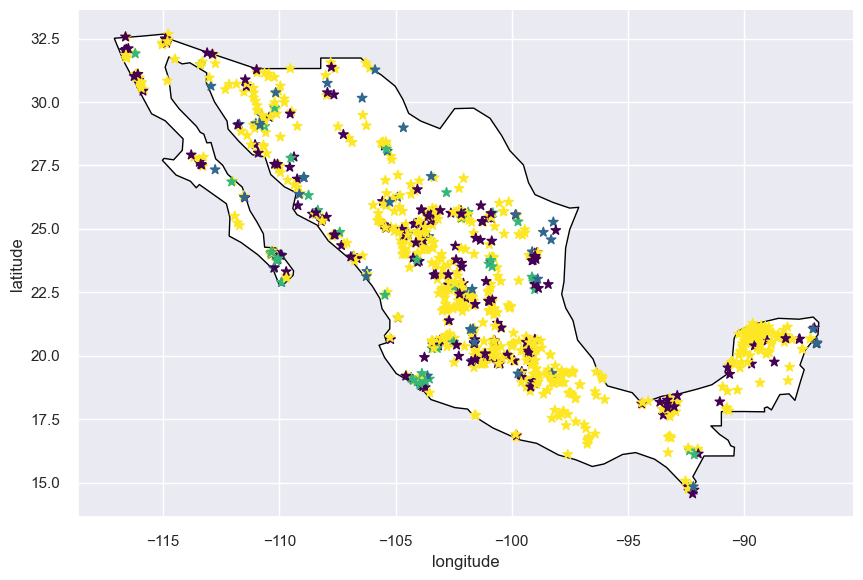

In [354]:
encoder = OneHotEncoder(drop= 'first')
transformer = ColumnTransformer([('encoder', encoder, ['y_calidad'])])

pipe_modelo = Pipeline([('transf', transformer),
                        ('modelo', KMeans(n_clusters= 5))])

df_subterraneas['cluster'] = pipe_modelo.fit_predict(df_subterraneas[subterraneas_col_localizacion + ['y_calidad']])

fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.scatter(df_subterraneas['LONGITUD'],
            df_subterraneas['LATITUD'],
             c=df_subterraneas['cluster'], s=50,
              cmap='viridis', marker= '*',
              label = 'cluster')
# plt.scatter(df_subterraneas['LONGITUD'],
#             df_subterraneas['LATITUD'],
#              c=[x[0] for x in enumerate(df_subterraneas['y_calidad'])],
#               s=50, cmap='viridis', marker= '.',
#               label = 'Por Reglas')

In [355]:
df_subterraneas.groupby(['cluster', 'y_calidad'])[['CLAVE']].count().sort_values(by = ['cluster','CLAVE'], ascending= False)

,,CLAVE
cluster,y_calidad,
4,Fuertemente contaminada,744
3,Contaminada,49
2,Aceptable,60
1,Buena Calidad,207


Con esto vemos que aunque ya estén agrupados por cluster solo la calidad no se ve que realmente dentro del mapa haya una relación entre ellos

## Superficiales

In [356]:
df_superficiales.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,20,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020.0,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,86.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,30,Excelente,NaN,NaN,96.2,Excelente,95.9,Excelente,95.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [357]:
columnas_faltantes = pd.DataFrame(df_superficiales.isna().sum() /len(df_superficiales)).sort_values(by= 0, ascending= False)
columnas_faltantes

,0
CALIDAD_TOX_FIS_FON_15,1.000000
TOX_FIS_FON_15_UT,1.000000
CALIDAD_TOX_D_48_FON,1.000000
TOX_D_48_FON_UT,1.000000
CALIDAD_OD_PORC_MED,0.882396
OD_PORC_MED,0.882396
CALIDAD TOX_D_48_SUP,0.815986
TOX_D_48_SUP_UT,0.815986
CALIDAD_ENTEROC,0.781695
ENTEROC_NMP_100mL,0.781695


En este dataset hay demasiados valores sin información los cuales tendremos que eliminar ya que imputarlos sería modificar demasiado los datos.
Por lo que si es que hay más del 50% de nulos serán eliminadas esas columnas

In [358]:
sin_info = columnas_faltantes.iloc[[columnas_faltantes.loc[x] > 0.5 for x in columnas_faltantes.index]].index

In [359]:
col_eliminar = columnas_faltantes.iloc[[columnas_faltantes.loc[x] > 0.5 for x in columnas_faltantes.index]].index
col_eliminar

Index(['CALIDAD_TOX_FIS_FON_15', 'TOX_FIS_FON_15_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_D_48_FON_UT', 'CALIDAD_OD_PORC_MED', 'OD_PORC_MED',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_SUP_UT', 'CALIDAD_ENTEROC',
       'ENTEROC_NMP_100mL', 'CALIDAD_OD_PORC_FON', 'OD_PORC_FON',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_SUP', 'TOX_FIS_SUP_15_UT',
       'CALIDAD_TOX_FIS_SUP_15', 'CALIDAD_OD_PORC', 'OD_PORC', 'TOX_D_48_UT',
       'CALIDAD_TOX_D_48', 'CALIDAD_TOX_V_15', 'TOX_V_15_UT'],
      dtype='object')

In [360]:
df_superficiales = df_superficiales.drop(col_eliminar, axis= 1)
df_superficiales.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020.0,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [361]:
columnas_faltantes = pd.DataFrame(df_superficiales.isna().sum() /len(df_superficiales)).sort_values(by= 0, ascending= False)
columnas_faltantes

,0
CONTAMINANTES,0.462449
DBO_mg/L,0.376721
CALIDAD_DQO,0.376721
DQO_mg/L,0.376721
CALIDAD_DBO,0.376721
CALIDAD_E_COLI,0.376479
E_COLI_NMP_100mL,0.376479
CALIDAD_COLI_FEC,0.376479
COLI_FEC_NMP_100mL,0.376479
CUERPO DE AGUA,0.159865


In [362]:
df_superficiales.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_DBO', 'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
       'CUMPLE_CON_TOX', 'GRUPO'],
      dtype='object')

In [363]:
superficial_col_id = ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
                     'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'GRUPO']

superficial_col_categorica = [x for x in df_superficiales.columns if x[0:7] == 'CALIDAD'] + ['SEMAFORO', 'CONTAMINANTES'] + [x for x in df_superficiales.columns if x[0:6]=='CUMPLE']

superficial_col_medida = [x for x in df_superficiales.columns if x[-1] == 'L']

superficial_col_localizacion = ['LONGITUD', 'LATITUD']

Ahora toca hacer la limpieza con los datos que ya tenemos separados y preparar un Pipeline tanto de limpieza como de preprocesamiento

In [364]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
pipe_categoricas = make_pipeline(SimpleImputer(strategy= 'most_frequent'), OneHotEncoder())

pipe_numericas = make_pipeline(SimpleImputer(strategy= 'mean'), StandardScaler())

transformer = make_column_transformer((pipe_categoricas, superficial_col_categorica))

Vamos a normalizar las variables de medidas por que también hay una categoria de "menor que" por lo que para no tirar esta información vamos a hacer una sepración por bins para pasarlo a categorias de pesos significativos

In [365]:
for col in superficial_col_medida:
    df_superficiales = normalizar(df_superficiales, col, 0.05)

df_superficiales

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,n_DBO_mg/L,n_DQO_mg/L,n_SST_mg/L,n_COLI_FEC_NMP_100mL,n_E_COLI_NMP_100mL
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO,Otros,Otros,Otros,Otros,Otros
1,DLSAN2308M1,PUENTE PASO AL BALCON,GOLFO NORTE,SAN LUIS POTOSI,TIERRA NUEVA,RIO SANTA MARIA 1,RIO SANTA MARIA,LOTICO,RIO,-100.43365,21.68987,2020.0,<2,Excelente,<10,Excelente,<10,Excelente,313,Aceptable,98,Excelente,Verde,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LOTICO,<2,<10,<10,Otros,Otros
2,DLCOA434,"PRESA VENUSTIANO CARRANZA, SURESTE",RIO BRAVO,COAHUILA DE ZARAGOZA,JUAREZ,RIO SALADO,PRESA VENUSTIANO CARRANZA,LENTICO (HUMEDAL),PRESA,-100.61208,27.44855,2020.0,<2,Excelente,11.82,Buena calidad,21,Excelente,1421,Contaminada,98,Excelente,Amarillo,"CF,",SI,SI,SI,NO,SI,ND,SI,SI,LENTICO,<2,Otros,Otros,Otros,Otros
3,OCPNO4455,RIO CULIACAN PUENTE USE,PACIFICO NORTE,SINALOA,CULIACAN,RIO CULIACAN,RIO CULIACAN,LOTICO,RIO,-107.44814,24.79331,2020.0,<2,Excelente,<10,Excelente,22.1,Excelente,578,Aceptable,98,Excelente,Verde,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LOTICO,<2,<10,Otros,Otros,Otros
4,OCPNO4622,RIO PRESIDIO 1,PACIFICO NORTE,SINALOA,MAZATLAN,RIO PRESIDIO 2,RIO PRESIDIO,LOTICO,RIO,-106.23032,23.18233,2020.0,<2,Excelente,14.28,Buena calidad,324.2,Contaminada,16580,Fuertemente contaminada,98,Excelente,Amarillo,"SST,CF,",SI,SI,NO,NO,SI,ND,SI,SI,LOTICO,<2,Otros,Otros,Otros,Otros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573,OCPNO4651,AGUAS DEBAJO DE LA DESCARGA DE LA CD. EL ROSARIO,PACIFICO NORTE,SINALOA,ROSARIO,RIO BALUARTE 2,RIO BALUARTE,LOTICO (HUMEDAL),RIO,-105.86382,22.97227,2020.0,54,Contaminada,75.5,Contaminada,825,Fuertemente contaminada,20140,Fuertemente contaminada,4880,Fuertemente contaminada,Rojo,"DBO,DQO,SST,CF,E_COLI,",NO,NO,NO,NO,NO,ND,SI,SI,LOTICO,Otros,Otros,Otros,Otros,Otros
2574,OCLSP3709M1,RIO BOLAÑOS ANTES DE LA POBLACION,LERMA SANTIAGO PACIFICO,JALISCO,BOLAÑOS,RIO BOLAÑOS 1,RIO BOLAÑOS,LOTICO,RIO,-103.77389,21.84911,2020.0,46.5,Contaminada,77.68,Contaminada,659,Fuertemente contaminada,7890,Contaminada,2430,Fuertemente contaminada,Rojo,"DBO,DQO,SST,CF,E_COLI,",NO,NO,NO,NO,NO,ND,SI,SI,LOTICO,Otros,Otros,Otros,Otros,Otros
2575,OCLSP3764M1,RIO BOLAÑOS PUENTE EN SAN MARTIN DE BOLAÑOS,LERMA SANTIAGO PACIFICO,JALISCO,SAN MARTIN DE BOLAÑOS,RIO BOLAÑOS 2,RIO SANTIAGO,LOTICO A - Tipo 10,RIO,-103.81025,21.68051,2020.0,42.5,Contaminada,111.15,Contaminada,508.5,Fuertemente contaminada,14300,Fuertemente contaminada,3730,Fuertemente contaminada,Rojo,"DBO,DQO,SST,CF,E_COLI,",NO,NO,NO,NO,NO,ND,SI,SI,LOTICO,Otros,Otros,Otros,Otros,Otros
2576,OCLSP3904M1,RIO SAN NICOLAS PUENTE CARRETERA A PUERTO VALL...,LERMA SANTIAGO PACIFICO,JALISCO,LA HUERTA,RIO SAN NICOLAS A,RIO SAN NICOLAS,LOTICO (HUMEDAL),RIO,-105.18233,19.65203,2020.0,52.5,Contaminada,52.75,Contaminada,492.67,Fuertemente contaminada,64880,Fuertemente contaminada,6770,Fuertemente contaminada,Rojo,"DBO,DQO,SST,CF,E_COLI,",NO,NO,NO,NO,NO,ND,SI,SI,LOTICO,Otros,Otros,Otros,Otros,Otros


Ya teniendo la normalización volvemos a sacar las columnas que tenminan siendo columnas unarias para poder así hacer que el modelo solo entrene con lo óptimo

In [366]:
varn = df_superficiales.filter(like='n_').columns.tolist()
unarias = [v for v,conteo in zip(varn, [ df_superficiales[v].unique().shape[0] for v in varn ] ) if conteo == 1]
print(unarias)
varn = [v for v in varn  if v not in unarias]

[]


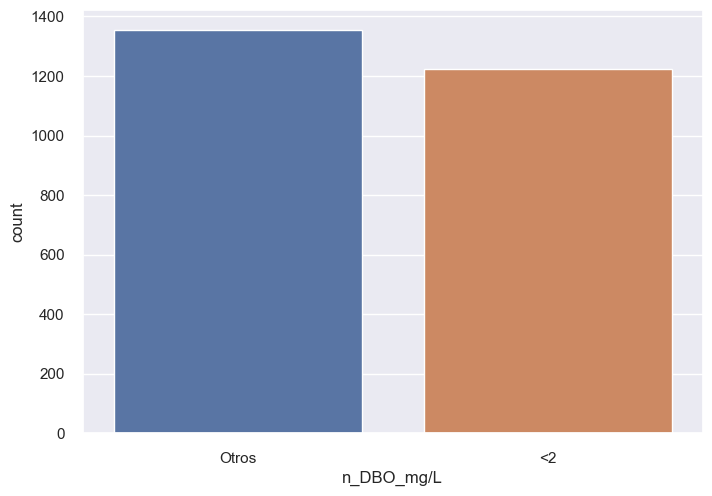

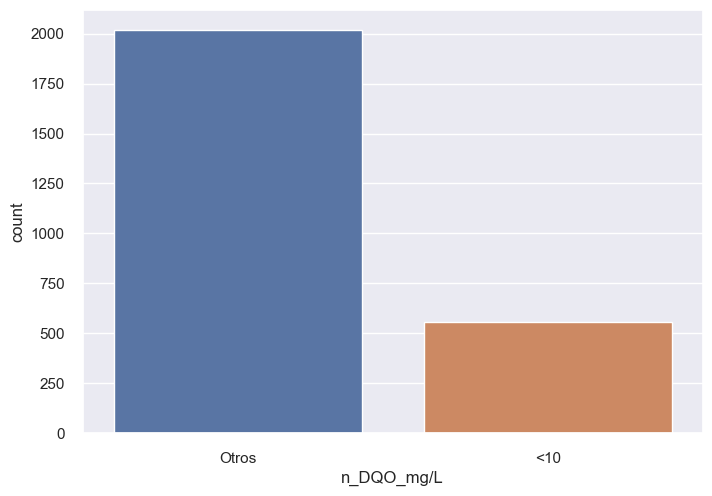

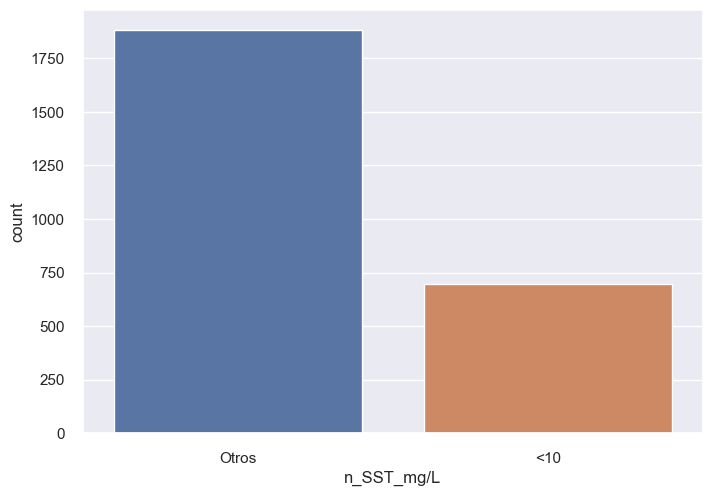

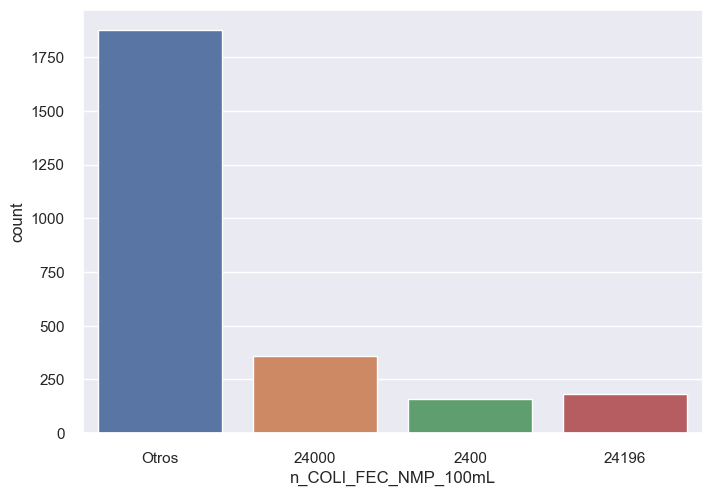

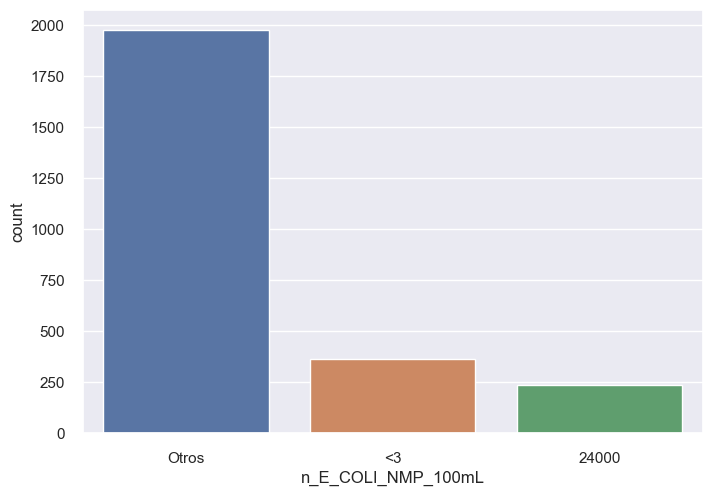

In [367]:
for x in varn:
    sns.countplot(x=df_superficiales[x])
    plt.show()

In [368]:
superficial_col_categorica += varn

In [369]:
X_cols = superficial_col_localizacion + superficial_col_categorica 

c:\Users\alexe\OneDrive\Documentos\Entornos virtuales\mna_env\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\alexe\OneDrive\Documentos\Entornos virtuales\mna_env\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\alexe\OneDrive\Documentos\Entornos virtuales\mna_env\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https:/

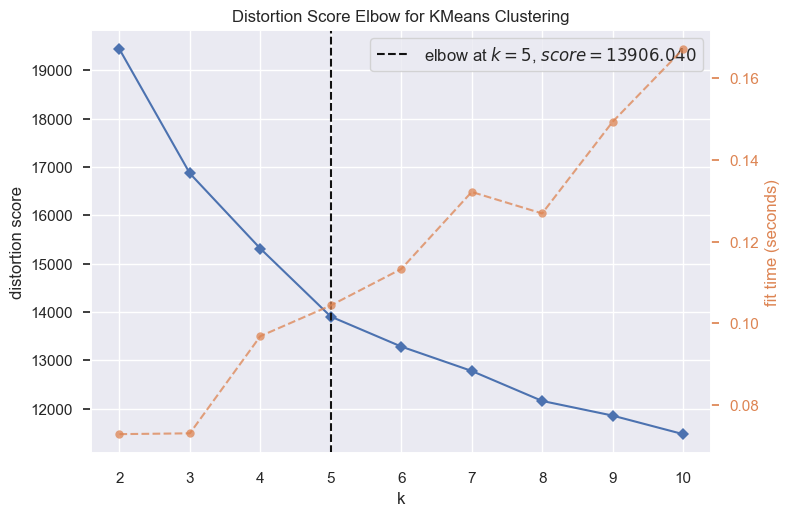

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [370]:
k_max = 11
inertia = []
for i in range(1,k_max+1):
    model_pipe = Pipeline([('transf_col', transformer),
                        ('modelo', KMeans(n_clusters= i))])
    model_pipe.fit(df_superficiales[X_cols])

    inertia.append(model_pipe['modelo'].inertia_)

visualizer = KElbowVisualizer(model_pipe['modelo'], k=(10))

visualizer.fit(model_pipe['transf_col'].fit_transform(df_superficiales[X_cols]))
visualizer.show()

In [372]:
model_pipe = Pipeline([('transf_col', transformer),
                        ('modelo', KMeans(n_clusters= 5))])
model_pipe.fit(df_superficiales[X_cols])

Pipeline(steps=[('transf_col',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['CALIDAD_DBO', 'CALIDAD_DQO',
                                                   'CALIDAD_SST',
                                                   'CALIDAD_COLI_FEC',
                                                   'CALIDAD_E_COLI', 'SEMAFORO',
                                                   'CONTAMINANTES',
                                                   'CUMPLE_CON_DBO',
                                                   'CUMPLE_CON_DQO',
                                                   'CUMPLE_CON_SST',
                                                   'CUMPLE_CON_CF',
                                                   'CUMPLE_CON_E_COLI',
                                                   'CUMPLE_CON_ENTEROC',
                                                   'CUMPLE_CON_OD',
                                                   'CUMPLE_CON_TOX',
                                                   'n_DBO_mg/L', 'n_DQO_mg/L',
                                                   'n_SST_mg/L',
                                                   'n_COLI_FEC_NMP_100mL',
                                                   'n_E_COLI_NMP_100mL'])])),
                ('modelo', KMeans(n_clusters=5))])

In [374]:
df_superficiales['cluster'] = model_pipe.predict(df_superficiales[X_cols])

<bound method Axes.get_legend_handles_labels of <AxesSubplot: >>

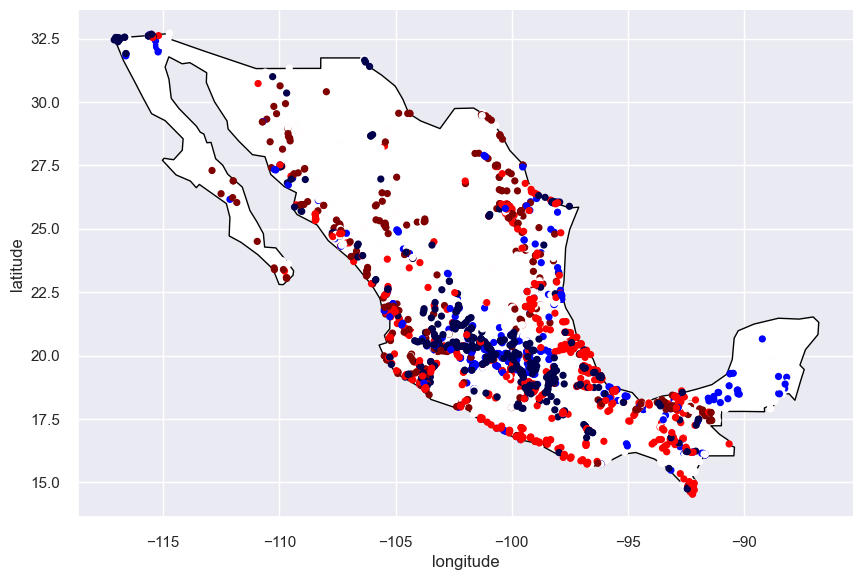

In [382]:
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.scatter(df_superficiales['LONGITUD'],
            df_superficiales['LATITUD'],
             c=df_superficiales['cluster'], s=70,
              cmap='seismic', marker= '.',
              label = 'cluster')

ax.get_legend_handles_labels

Aquí claramente si se puede ver una relación entre la localización y la calidad ya que como podemos ver tenemos puntos que están en un solo color en las zonas centrales y una clara distribución en las costas lo que nos puede estar hablandop de salinidad.

## Fin Entrega 1 